# Import Packages & Data 

In [167]:
import os

import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# import kaggle_evaluation.jane_street_inference_server

pd.set_option('display.max_columns', None)

# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
pd.options.display.float_format = "{:.2f}".format
# # Reset to default float format
# pd.reset_option('display.float_format')

features_name = [f"feature_{i:02d}" for i in range(79)]

# features_name = features_name + ['symbol_id']


In [4]:

train_data_path = 'E:\\JSRT market data Forecasting\\0 Data\\train.parquet\\'

f'E:\\JSRT market data Forecasting\\0 Data\\train.parquet\\partition_id=0\\part-0.parquet'




def train_data_reader(train_data_path):
    """
    Train data reader
    
    output:
    
    df_train_0: partion_id=0 (debug model)
    
    all_df_train: entire training data set

    """
    all_df_train = pd.DataFrame() 
    temp_data = pd.DataFrame() 
    
    for data_partition_ind in range(10):
        print(data_partition_ind)
        
        temp_data = pd.read_parquet(os.path.join(train_data_path, ('partition_id='+ str(data_partition_ind)+'\\part-0.parquet')))
        
        all_df_train =  pd.concat([all_df_train, temp_data])
    
    df_train_0 = pd.read_parquet(os.path.join(train_data_path, ('partition_id='+ str(0)+'\\part-0.parquet')))
    
    
    return all_df_train, df_train_0




all_df_train, df_train_0 = train_data_reader(train_data_path)



df_train_0 = df_train_0.iloc[:10000,:]

0
1
2
3
4
5
6
7
8
9


In [146]:
all_df_train.head()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.89,NaN,NaN,NaN,NaN,NaN,0.85,0.24,0.26,-0.89,11,7,76,-0.88,0.00,-0.74,NaN,-0.17,NaN,-1.34,-1.71,0.91,NaN,1.64,1.52,-1.55,-0.23,NaN,NaN,1.38,-0.28,0.12,NaN,NaN,NaN,0.28,0.27,0.35,-0.01,-0.23,NaN,-1.07,NaN,NaN,-0.18,NaN,NaN,NaN,0.56,2.09,0.83,NaN,0.20,NaN,NaN,-0.81,NaN,-2.04,0.73,NaN,-0.99,-0.35,-1.36,NaN,NaN,NaN,NaN,NaN,-1.25,-0.11,-0.49,-1.02,0.15,-0.66,NaN,NaN,-0.26,-0.21,-0.34,-0.28,0.74,-0.07,1.38,2.01,0.19,1.22,0.78,0.35,0.10
1,0,0,7,1.37,NaN,NaN,NaN,NaN,NaN,0.68,0.15,0.19,-0.52,11,7,76,-0.87,-0.23,-0.58,NaN,0.32,NaN,-1.25,-1.68,1.41,NaN,0.52,0.74,-0.79,0.64,NaN,NaN,0.23,0.58,1.13,NaN,NaN,NaN,-1.51,-1.41,-1.82,-0.08,-0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.84,-0.00,-0.62,NaN,1.17,NaN,NaN,-1.63,NaN,-1.41,1.06,NaN,0.89,0.47,-1.36,NaN,NaN,NaN,NaN,NaN,-1.07,0.01,-0.59,-1.05,-0.39,-0.74,NaN,NaN,-0.28,-0.18,-0.25,-0.30,2.97,1.19,-0.52,3.85,2.63,5.00,0.70,0.22,0.78
2,0,0,9,2.29,NaN,NaN,NaN,NaN,NaN,1.06,0.19,0.25,-0.77,11,7,76,-0.68,-0.20,-0.59,NaN,-0.81,NaN,-1.30,-2.04,0.64,NaN,1.60,0.66,-1.35,0.36,NaN,NaN,-0.02,-0.32,-0.12,NaN,NaN,NaN,-0.32,-0.96,-2.44,0.07,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.42,-3.52,-4.68,NaN,0.54,NaN,NaN,-0.73,NaN,-2.29,1.76,NaN,-0.12,-0.06,-1.36,NaN,NaN,NaN,NaN,NaN,-0.88,-0.07,-0.62,-0.86,-0.24,-0.71,NaN,NaN,0.38,0.30,-0.11,-0.10,-0.86,-0.28,-0.33,0.38,1.27,0.10,2.11,0.67,0.77
3,0,0,10,0.69,NaN,NaN,NaN,NaN,NaN,1.14,0.27,0.31,-1.26,42,5,150,-0.69,3.00,0.11,NaN,-0.25,NaN,-1.90,-0.98,0.24,NaN,-0.39,-0.22,-2.13,-0.86,NaN,NaN,0.40,-0.58,0.11,NaN,NaN,NaN,0.54,-0.09,-1.50,-0.20,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.67,0.61,NaN,2.41,NaN,NaN,1.31,NaN,-0.81,2.94,NaN,3.99,1.83,-1.36,NaN,NaN,NaN,NaN,NaN,-0.70,1.07,-0.21,-0.53,4.77,0.57,NaN,NaN,-0.23,-0.25,-0.22,-0.30,0.41,0.22,2.29,1.10,1.23,1.23,1.11,0.78,-1.38
4,0,0,14,0.44,NaN,NaN,NaN,NaN,NaN,0.96,0.26,0.34,-0.61,44,3,16,-0.95,-0.03,-0.50,NaN,0.65,NaN,-1.84,-1.59,-0.18,NaN,-0.97,-0.67,-1.28,-1.40,NaN,NaN,0.04,-0.32,-0.03,NaN,NaN,NaN,-0.09,-1.00,-2.64,-0.20,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.01,-2.32,-3.71,NaN,1.25,NaN,NaN,0.48,NaN,-0.77,2.84,NaN,1.38,0.41,-1.36,NaN,NaN,NaN,NaN,NaN,-0.95,-0.14,-0.45,-1.14,0.10,-0.66,NaN,NaN,3.68,2.79,2.62,3.42,-0.37,-0.50,-0.35,-3.93,-1.59,-5.00,-3.57,-1.09,-5.00


#### unique_date_id


In [109]:
unique_date_id_summary = all_df_train['date_id'].value_counts()

In [111]:
unique_date_id_summary

date_id
1698    37752
1301    37752
1285    37752
1286    37752
1288    37752
        ...  
17       6792
11       5943
15       5943
19       5094
18       3396
Name: count, Length: 1699, dtype: int64

In [113]:
len(unique_date_id_summary)

1699

In [115]:
unique_date_id_summary_max = unique_date_id_summary.max()
unique_date_id_summary_max

37752

In [100]:
len(unique_date_id_summary)

39

#### unique_symbol_id


In [123]:
unique_date_symbol_id = all_df_train['symbol_id'].value_counts()

In [125]:
unique_date_symbol_id

symbol_id
19    1550501
7     1546272
1     1543979
16    1538290
9     1525333
10    1515692
12    1514621
33    1508099
13    1507964
2     1484398
38    1478146
17    1473734
0     1468466
34    1465720
11    1460507
14    1458690
3     1446495
30    1429094
8     1404768
15    1367847
26    1147464
20    1145409
22    1141537
36    1139720
29    1127985
25    1126287
23    1086146
5     1057321
37     942832
21     940653
28     937024
35     911856
27     861520
31     716320
24     706640
4      683408
6      611776
32     595320
18     559504
Name: count, dtype: int64

In [127]:
len(unique_date_symbol_id)

39

## Missing Values Check

### Entire Data (Training)

In [130]:
train_data = all_df_train

In [138]:
missing_values_count = train_data.isnull().sum()
missing_values_df = pd.DataFrame(missing_values_count, columns=['Missing Values'])
# Add a new column to calculate the percentage of missing values
missing_values_df['% of Missing Values'] = (missing_values_df['Missing Values'] / len(train_data)) * 100

In [140]:
missing_values_df = missing_values_df.sort_values(by='% of Missing Values', ascending=False)
missing_values_df = missing_values_df.transpose()

In [148]:
missing_values_df

,feature_27,feature_21,feature_31,feature_26,feature_39,feature_42,feature_53,feature_50,feature_02,feature_01,feature_04,feature_03,feature_00,feature_15,feature_44,feature_41,feature_55,feature_52,feature_73,feature_74,feature_33,feature_32,feature_58,feature_46,feature_45,feature_65,feature_66,feature_08,feature_62,feature_64,feature_63,feature_17,feature_43,feature_40,feature_76,feature_75,feature_77,feature_78,feature_51,feature_54,feature_37,feature_16,feature_56,feature_57,feature_18,feature_19,feature_47,responder_3,responder_4,responder_5,feature_61,responder_7,responder_2,responder_1,feature_67,responder_0,responder_6,feature_69,feature_70,feature_60,feature_71,feature_72,feature_68,date_id,feature_59,feature_49,symbol_id,weight,feature_05,feature_06,feature_07,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_20,feature_22,feature_23,feature_24,feature_25,feature_28,feature_29,feature_30,feature_34,feature_35,feature_36,feature_38,time_id,feature_48,responder_8
Missing Values,8435985.00,8435985.00,8435985.00,8435985.00,4300649.00,4300649.00,4254098.00,4254098.00,3182052.00,3182052.00,3182052.00,3182052.00,3182052.00,1209299.00,1093012.00,1093012.00,1044898.00,1044898.00,483759.00,483759.00,478457.00,478457.00,478452.00,317163.00,317163.00,317163.00,317163.00,300247.00,292827.00,237663.00,227566.00,201838.00,67856.00,67856.00,58430.00,58430.00,20043.00,20043.00,13805.00,13805.00,849.00,261.00,226.00,226.00,226.00,226.00,87.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
% of Missing Values,17.90,17.90,17.90,17.90,9.13,9.13,9.03,9.03,6.75,6.75,6.75,6.75,6.75,2.57,2.32,2.32,2.22,2.22,1.03,1.03,1.02,1.02,1.02,0.67,0.67,0.67,0.67,0.64,0.62,0.50,0.48,0.43,0.14,0.14,0.12,0.12,0.04,0.04,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [150]:
train_data.describe()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
count,47127338.00,47127338.00,47127338.00,47127338.00,43945286.00,43945286.00,43945286.00,43945286.00,43945286.00,47127338.00,47127338.00,47127338.00,46827091.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00,45918039.00,47127077.00,46925500.00,47127112.00,47127112.00,47127338.00,38691353.00,47127338.00,47127338.00,47127338.00,47127338.00,38691353.00,38691353.00,47127338.00,47127338.00,47127338.00,38691353.00,46648881.00,46648881.00,47127338.00,47127338.00,47127338.00,47126489.00,47127338.00,42826689.00,47059482.00,46034326.00,42826689.00,47059482.00,46034326.00,46810175.00,46810175.00,47127251.00,47127338.00,47127338.00,42873240.00,47113533.00,46082440.00,42873240.00,47113533.00,46082440.00,47127112.00,47127112.00,46648886.00,47127338.00,47127338.00,47127338.00,46834511.00,46899772.00,46889675.00,46810175.00,46810175.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00,46643579.00,46643579.00,47068908.00,47068908.00,47107295.00,47107295.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00,47127338.00
mean,1005.48,468.71,18.10,2.01,0.57,0.01,0.57,0.57,-0.00,-0.04,-0.01,-0.01,0.08,32.76,4.88,170.69,-0.04,-0.03,-0.04,-0.25,-0.20,-0.24,-0.01,-0.03,-0.21,0.04,0.07,0.07,0.57,0.09,-0.05,-0.23,-0.16,-0.22,-0.26,0.04,0.42,-0.02,0.45,0.45,0.00,0.04,0.05,0.03,0.02,0.04,-0.06,-0.05,-0.08,0.02,-0.04,-0.01,-0.00,-0.00,-0.08,-0.10,-0.10,0.07,0.05,0.09,-0.03,0.03,-0.02,-0.00,-0.01,0.01,-0.18,-0.15,-0.17,-0.04,-0.05,-0.04,-0.02,-0.04,-0.03,-0.02,-0.04,-0.02,-0.02,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.02,-0.01,-0.02,-0.00,0.00,-0.00
std,445.18,272.52,11.30,1.15,1.28,1.02,1.28,1.28,0.97,0.96,1.01,1.00,0.91,23.90,3.04,164.52,0.86,0.85,0.86,0.84,0.82,0.84,0.97,0.99,0.85,0.86,0.91,0.87,1.38,0.94,1.01,1.00,0.97,0.80,0.84,0.70,1.21,0.92,1.25,1.25,0.86,0.87,0.87,0.87,0.77,0.81,0.87,0.77,0.81,0.89,0.91,1.13,0.82,0.83,0.97,0.85,0.93,0.98,0.85,0.92,0.93,0.97,0.89,0.90,0.90,1.05,0.76,0.69,0.69,0.98,1.00,0.85,0.84,0.85,0.88,0.84,0.86,0.93,0.92,0.92,0.91,0.91,0.91,0.55,0.56,0.56,0.77,0.82,0.70,0.84,0.86,0.82
min,0.00,0.00,0.00,0.15,-5.79,-5.74,-5.73,-5.60,-5.80,-25.35,-58.60,-39.09,-15.57,2.00,1.00,9.00,-1.91,-0.92,-1.40,-1.69,-1.76,-1.73,-6.00,-5.77,-4.62,-0.56,-2.60,-2.59,-3.23,-2.18,-3.45,-3.48,-4.06,-1.60,-1.67,-0.50,-5.84,-5.45,-5.30,-4.89,-5.16,-14.93,-29.20,-5.61,-5.28,-5.02,-5.36,-5.16,-5.85,-5.73,-5.32,-49.95,-311.42,-109.71,-5.32,-5.32,-5.36,-5.35,-5.61,-5.70,-5.53,-5.37,-36.41,-169.92,-62.64,-5.74,-0.93,-0.83,-0.95,-5.22,-5.91,-1.70,-0.74,-1.32,-1.89,-0.83,-1.40,-7.02,-6.11,-6.28,-5.73,-5.92,-6.16,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00
25%,679.00,233.00,9.00,1.21,-0.33,-0.72,-0.33,-0.33,-0.71,-0.49,-0.42,-0.46,-0.38,11.00,3.00,59.00,-0.50,-0.38,-0.48,-0.70,-0.62,-0.69,-0.70,-0.74,-0.75,-0.19,-0.66,-0.67,-0.43,-0.72,-0.81,-1.06,-0.92,-0.66,-0.73,-0.19,-0.46,-0.65,-0.46,-0.46,-0.61,-0.43,-0.43,-0.61,-0.50,-0.51,-0.67,-0.58,-0.63,-0.64,-0.71,-0

### Correlation matrix (features)

In [152]:
# correlation matrix
train_cormat = train_data[features_name].corr()
round(train_cormat,2)

,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
feature_00,1.00,0.06,0.94,0.95,0.03,-0.04,0.00,-0.00,0.11,-0.00,0.01,-0.00,0.01,0.01,0.01,-0.15,-0.14,-0.15,-0.00,-0.04,-0.07,-0.00,-0.02,-0.01,0.19,0.11,-0.00,-0.15,-0.17,-0.13,-0.16,-0.00,0.51,-0.02,0.53,0.53,0.01,0.03,0.07,-0.00,0.01,0.01,-0.01,-0.02,-0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.03,-0.07,-0.05,0.02,0.04,0.04,-0.04,-0.00,-0.02,-0.00,-0.01,-0.20,-0.09,-0.09,-0.11,-0.01,-0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.02,0.03,0.02,0.03,0.02
feature_01,0.06,1.00,-0.01,0.00,0.32,0.18,0.01,0.11,-0.01,-0.00,0.00,-0.00,0.02,0.05,0.06,-0.01,-0.01,-0.01,-0.14,-0.12,-0.01,0.00,-0.00,-0.00,0.02,0.01,-0.00,-0.01,-0.01,-0.01,-0.01,0.00,0.01,-0.00,0.02,0.02,0.07,-0.02,0.06,0.05,-0.01,0.02,0.01,-0.04,-0.04,-0.07,0.15,0.00,0.01,0.03,0.05,0.01,0.03,0.00,-0.03,-0.02,-0.09,0.14,0.04,0.01,0.02,-0.01,0.01,0.00,0.01,-0.16,-0.12,0.01,0.03,0.05,0.02,0.05,0.07,0.04,0.04,0.02,0.01,0.03,0.02
feature_02,0.94,-0.01,1.00,0.95,-0.02,-0.05,-0.01,-0.02,0.10,-0.00,0.01,-0.00,0.01,0.00,0.01,-0.15,-0.14,-0.15,0.01,-0.03,-0.07,-0.00,-0.02,-0.01,0.19,0.11,-0.00,-0.15,-0.17,-0.13,-0.16,-0.00,0.51,-0.02,0.53,0.53,0.00,0.04,0.06,-0.01,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00,-0.03,-0.07,-0.05,0.02,0.04,0.04,-0.03,-0.01,-0.02,-0.00,-0.01,-0.20,-0.09,-0.09,-0.11,0.00,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.03,0.02,0.03,0.02
feature_03,0.95,0.00,0.95,1.00,0.01,-0.05,0.00,-0.01,0.11,-0.00,0.01,-0.00,0.01,0.01,0.01,-0.15,-0.14,-0.15,0.01,-0.03,-0.07,-0.00,-0.02,-0.01,0.19,0.11,-0.00,-0.15,-0.17,-0.13,-0.16,-0.00,0.51,-0.02,0.53,0.53,0.01,0.04,0.06,-0.01,0.01,0.00,-0.01,-0.02,-0.01,-0.02,-0.02,-0.02,-0.00,-0.00,-0.03,-0.07,-0.05,0.02,0.04,0.04,-0.04,-0.01,-0.02,-0.00,-0.01,-0.20,-0.09,-0.09,-0.11,0.00,-0.03,0.00,0.01,0.01,0.00,0.01,0.01,0.03,0.02,0.03,0.02,0.03,0.02
feature_04,0.03,0.32,-0.02,0.01,1.00,0.11,0.15,0.26,0.00,-0.00,0.00,-0.00,-0.01,0.03,0.03,0.00,-0.00,0.00,-0.05,-0.06,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.02,0.01,0.01,0.10,0.00,0.03,0.03,-0.01,0.01,0.03,-0.02,0.00,-0.04,0.06,-0.02,0.04,0.03,0.03,0.03,0.03,0.02,0.00,0.01,-0.05,0.05,0.01,0.03,-0.00,-0.00,0.00,0.00,0.00,-0.06,-0.06,-0.01,0.02,0.03,-0.01,0.04,0.03,0.02,0.02,0.01,0.01,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_74,0.02,0.04,0.02,0.02,0.02,0.05,0.00,0.01,-0.09,-0.00,-0.03,-0.08,-0.00,0.03,0.04,-0.04,-0.05,-0.04,-0.10,-0.05,-0.11,-0.03,-0.14,-0.25,0.00,-0.00,-0.06,-0.03,0.00,-0.16,-0.14,-0.04,-0.00,0.02,-0.01,-0.01,0.00,-0.04,-0.08,0.07,0.01,0.04,-0.05,-0.02,-0.03,0.05,0.00,0.03,0.00,0.01,0.09,-0.02,0.04,-0.06,0.01,-0.03,0.06,-0.01,0.03,0.00,0.01,-0.01,0.05,0.03,0.04,-0.10,-0.05,-0.02,0.02,0.02,0.01,0.03,0.05,0.96,1.00,0.63,0.64,0.88,0.89
feature_75,0.03,0.02,0.03,0.03,0.01,0.04,0.00,0.02,-0.03,-0.00,-0.03,-0.06,0.01,0.07,0.05,-0.04,0.00,-0.02,-0.03,-0.06,-0.09,-0.02,-0.10,-0.19,0.01,0.00,-

In [157]:
pd.set_option('display.max_rows', None)

round(train_cormat,2)

,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
feature_00,1.00,0.06,0.94,0.95,0.03,-0.04,0.00,-0.00,0.11,-0.00,0.01,-0.00,0.01,0.01,0.01,-0.15,-0.14,-0.15,-0.00,-0.04,-0.07,-0.00,-0.02,-0.01,0.19,0.11,-0.00,-0.15,-0.17,-0.13,-0.16,-0.00,0.51,-0.02,0.53,0.53,0.01,0.03,0.07,-0.00,0.01,0.01,-0.01,-0.02,-0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.03,-0.07,-0.05,0.02,0.04,0.04,-0.04,-0.00,-0.02,-0.00,-0.01,-0.20,-0.09,-0.09,-0.11,-0.01,-0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.02,0.03,0.02,0.03,0.02
feature_01,0.06,1.00,-0.01,0.00,0.32,0.18,0.01,0.11,-0.01,-0.00,0.00,-0.00,0.02,0.05,0.06,-0.01,-0.01,-0.01,-0.14,-0.12,-0.01,0.00,-0.00,-0.00,0.02,0.01,-0.00,-0.01,-0.01,-0.01,-0.01,0.00,0.01,-0.00,0.02,0.02,0.07,-0.02,0.06,0.05,-0.01,0.02,0.01,-0.04,-0.04,-0.07,0.15,0.00,0.01,0.03,0.05,0.01,0.03,0.00,-0.03,-0.02,-0.09,0.14,0.04,0.01,0.02,-0.01,0.01,0.00,0.01,-0.16,-0.12,0.01,0.03,0.05,0.02,0.05,0.07,0.04,0.04,0.02,0.01,0.03,0.02
feature_02,0.94,-0.01,1.00,0.95,-0.02,-0.05,-0.01,-0.02,0.10,-0.00,0.01,-0.00,0.01,0.00,0.01,-0.15,-0.14,-0.15,0.01,-0.03,-0.07,-0.00,-0.02,-0.01,0.19,0.11,-0.00,-0.15,-0.17,-0.13,-0.16,-0.00,0.51,-0.02,0.53,0.53,0.00,0.04,0.06,-0.01,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00,-0.03,-0.07,-0.05,0.02,0.04,0.04,-0.03,-0.01,-0.02,-0.00,-0.01,-0.20,-0.09,-0.09,-0.11,0.00,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.03,0.02,0.03,0.02
feature_03,0.95,0.00,0.95,1.00,0.01,-0.05,0.00,-0.01,0.11,-0.00,0.01,-0.00,0.01,0.01,0.01,-0.15,-0.14,-0.15,0.01,-0.03,-0.07,-0.00,-0.02,-0.01,0.19,0.11,-0.00,-0.15,-0.17,-0.13,-0.16,-0.00,0.51,-0.02,0.53,0.53,0.01,0.04,0.06,-0.01,0.01,0.00,-0.01,-0.02,-0.01,-0.02,-0.02,-0.02,-0.00,-0.00,-0.03,-0.07,-0.05,0.02,0.04,0.04,-0.04,-0.01,-0.02,-0.00,-0.01,-0.20,-0.09,-0.09,-0.11,0.00,-0.03,0.00,0.01,0.01,0.00,0.01,0.01,0.03,0.02,0.03,0.02,0.03,0.02
feature_04,0.03,0.32,-0.02,0.01,1.00,0.11,0.15,0.26,0.00,-0.00,0.00,-0.00,-0.01,0.03,0.03,0.00,-0.00,0.00,-0.05,-0.06,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.02,0.01,0.01,0.10,0.00,0.03,0.03,-0.01,0.01,0.03,-0.02,0.00,-0.04,0.06,-0.02,0.04,0.03,0.03,0.03,0.03,0.02,0.00,0.01,-0.05,0.05,0.01,0.03,-0.00,-0.00,0.00,0.00,0.00,-0.06,-0.06,-0.01,0.02,0.03,-0.01,0.04,0.03,0.02,0.02,0.01,0.01,0.02,0.02
feature_05,-0.04,0.18,-0.05,-0.05,0.11,1.00,0.23,0.66,-0.48,0.00,-0.00,0.00,-0.01,-0.01,-0.01,0.02,0.02,0.02,-0.10,0.14,0.02,-0.00,-0.00,-0.00,-0.01,0.00,0.00,0.01,0.01,0.00,0.01,-0.00,0.00,0.18,-0.04,-0.03,0.04,-0.26,-0.28,0.31,0.01,0.12,0.21,-0.01,0.05,0.32,0.26,0.36,0.10,0.31,0.33,0.01,0.14,0.22,-0.03,0.05,0.33,0.27,0.52,0.11,0.35,0.03,0.02,0.02,0.02,-0.10,0.14,-0.08,-0.06,-0.09,0.07,0.05,0.08,0.03,0.05,0.04,0.06,0.04,0.06
feature_06,0.00,0.01,-0.01,0.00,0.15,0.23,1.00,0.54,-0.06,0.00,-0.00,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.02,-0.03,-0.03,0.11,0.11,0.16,0.12,0.10,0.16,0.05,0.06,0.07,0.33,0.21,0.13,0.11,0.21,0.14,0.08,0.20,0.06,0.07,0.12,0.38,0.24,0.00,0.00,0.00,0.00,-0.01,0.00,-0.01,-0.08,-0.03,0.01,0.10,0.03,-0.00,0.00,0.00,0.01,-0.00,-0.00
feature_07,-0.00,0.11,-0.02,-0.01,0.26,0.66,0.54,1.00,-0.

In [159]:
pd.reset_option('display.max_rows')

<Axes: >

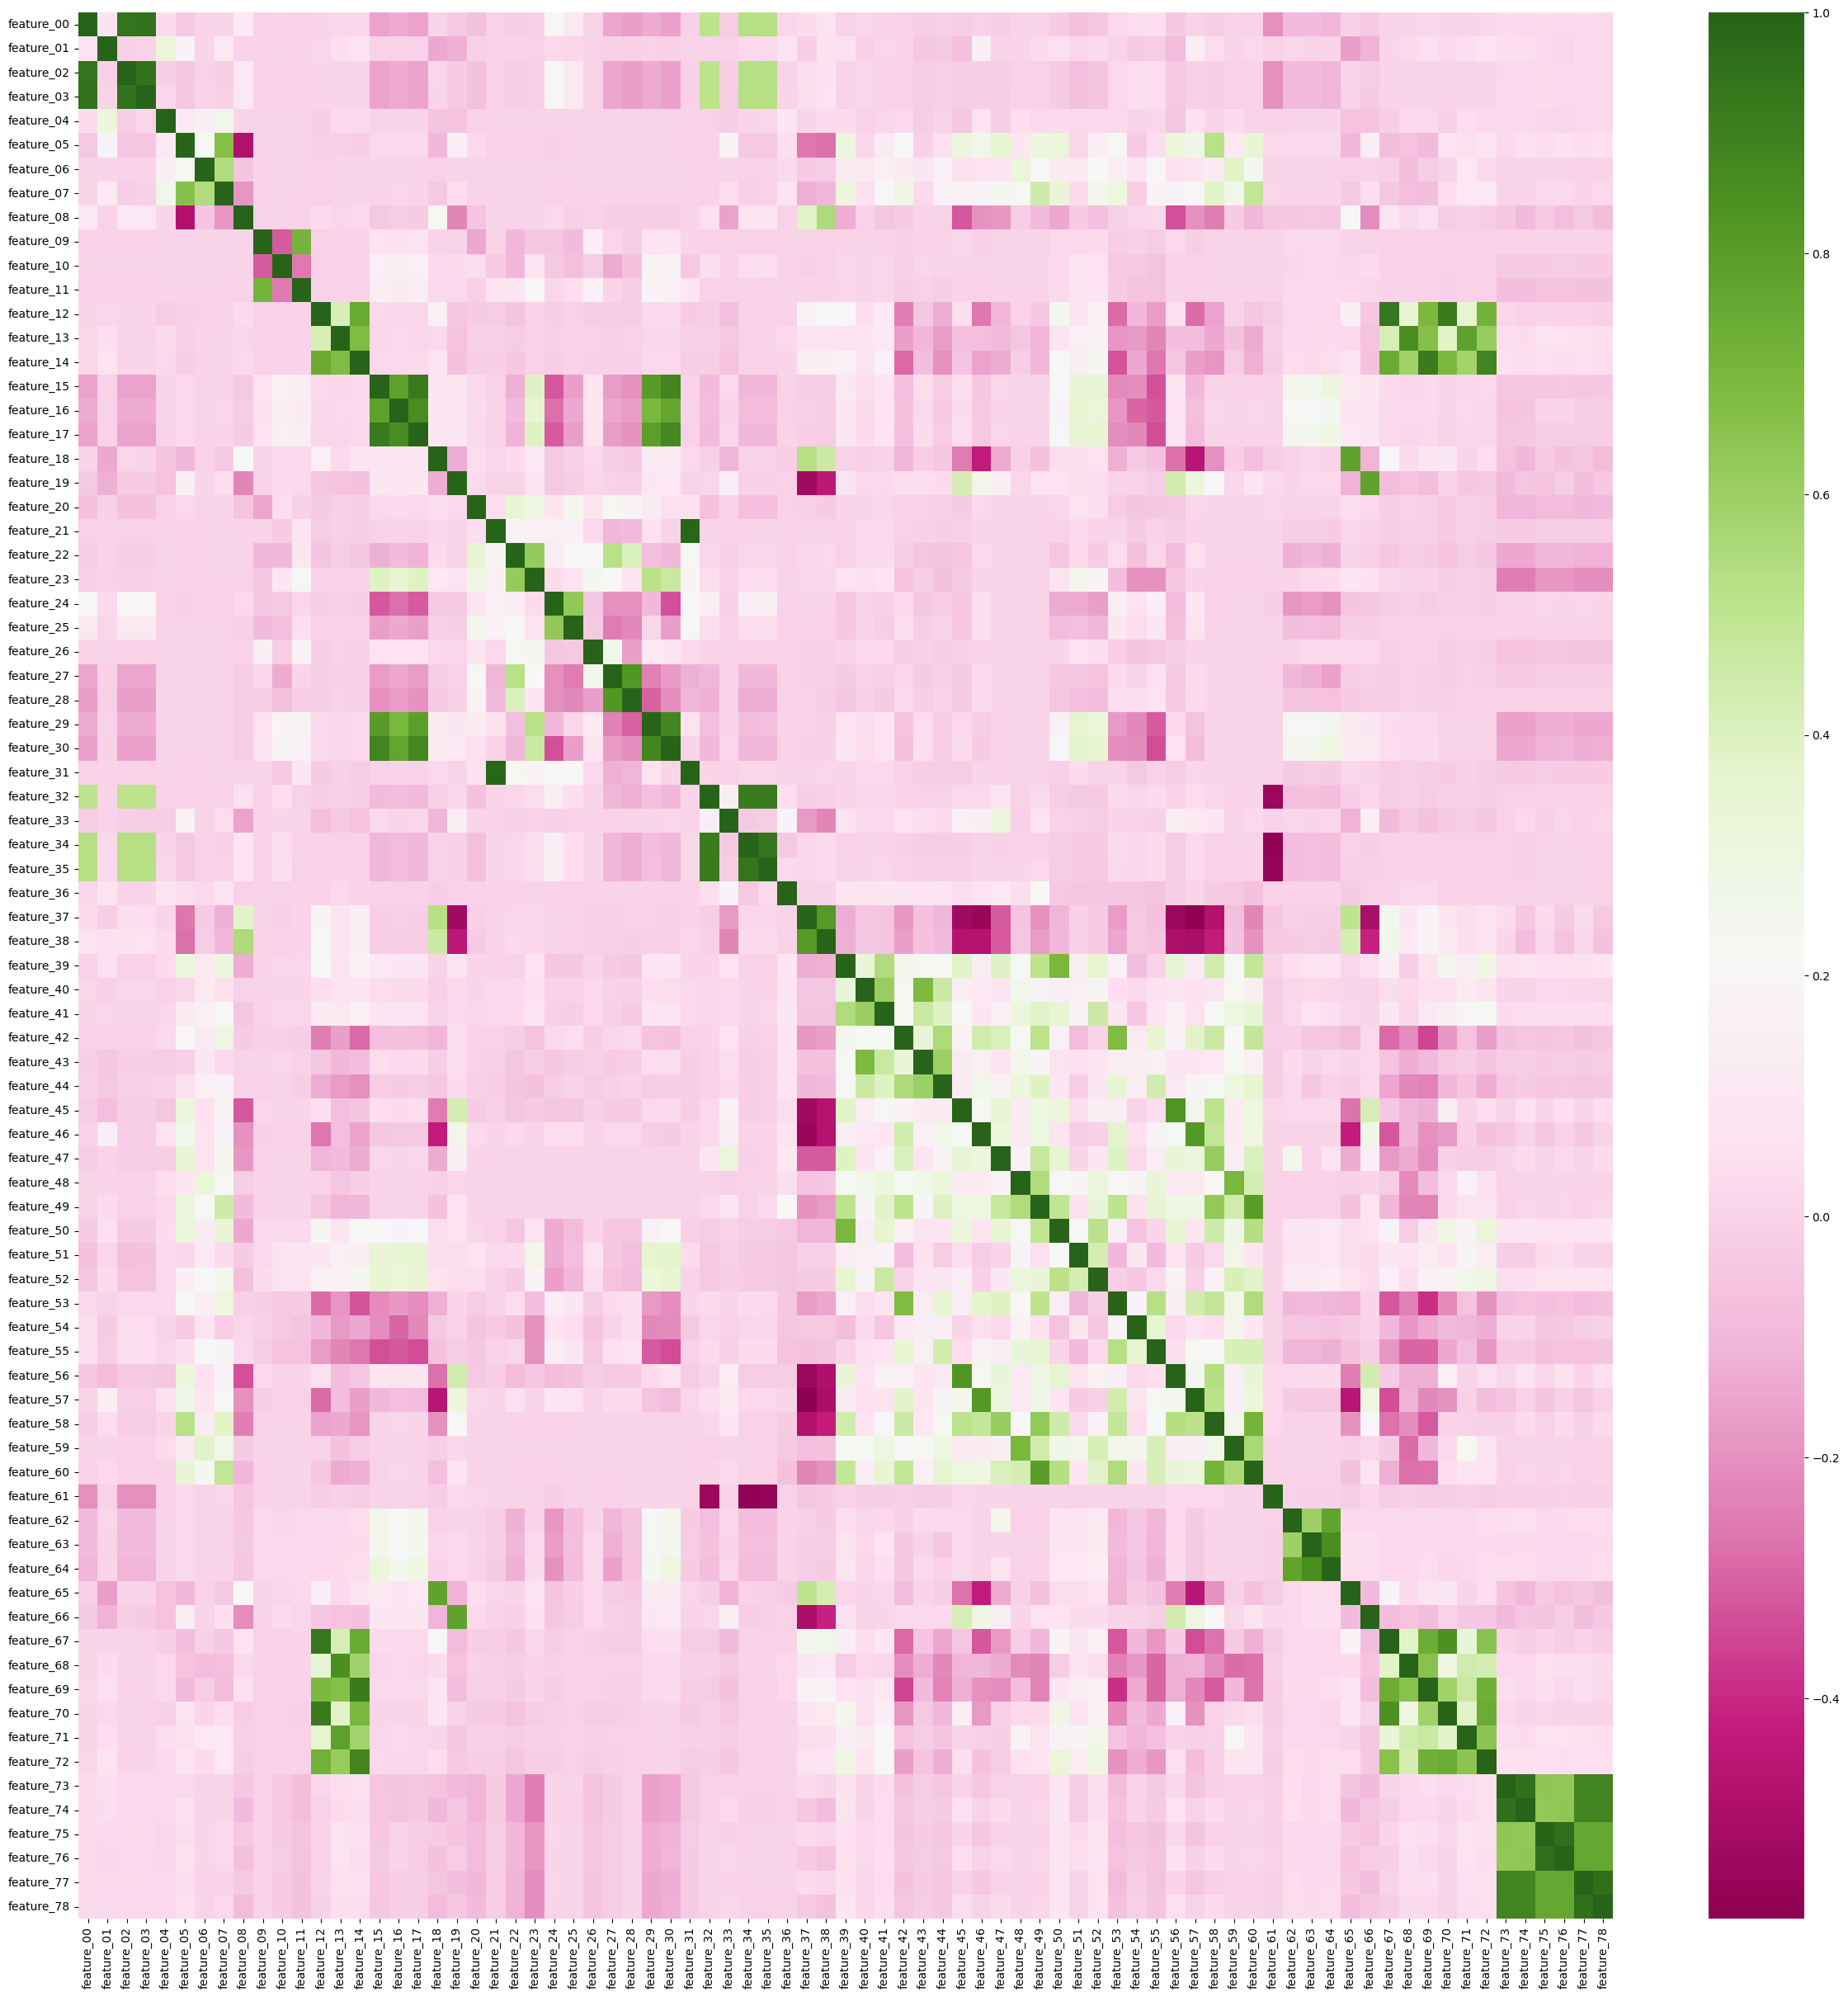

In [179]:
plt.figure(figsize=(30, 30)) 
sns.heatmap(train_cormat, cmap="PiYG")

### Grouped by Date?

There might be new symbol ID, can we build model by symbol ID. In testing, we use a classify new symbol id data to existing one. (Group existing symbol_id) 

### Grouped by symbol_id

# Test set

In [191]:
test_data_path = 'E:\\JSRT market data Forecasting\\0 Data\\test.parquet\\date_id=0'


def test_data_reader(test_data_path):
    """
    test data

    """
        
    df_0 = pd.read_parquet(test_data_path)
    
    
    return df_0

In [193]:
test_data = test_data_reader(test_data_path)

In [197]:
test_data

,row_id,date_id,time_id,symbol_id,weight,is_scored,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
0,0,0,0,0,3.17,True,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,NaN,-0.00,NaN,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,NaN,NaN,0.00,0.00,-0.00,-0.00,-0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,-0.00,0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,NaN,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,NaN,NaN,0.00,0.00,-0.00,-0.00
1,1,0,0,1,2.17,True,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,NaN,-0.00,NaN,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,NaN,NaN,0.00,0.00,0.00,0.00,-0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,NaN,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,NaN,NaN,0.00,0.00,0.00,0.00
2,2,0,0,2,3.07,True,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,NaN,-0.00,NaN,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,NaN,NaN,0.00,0.00,-0.00,0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,-0.00,-0.00,-0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,NaN,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,NaN,NaN,0.00,0.00,-0.00,-0.00
3,3,0,0,3,2.70,True,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,NaN,-0.00,NaN,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN,NaN,0.00,0.00,-0.00,0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,-0.00,0.00,-0.00,NaN,-0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,NaN,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,NaN,NaN,0.00,0.00,-0.00,-0.00
4,4,0,0,4,1.80,True,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,NaN,-0.00,NaN,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,NaN,NaN,0.00,0.00,-0.00,0.00,0.00,NaN,-0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,NaN,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,NaN,NaN,0.00,0.00,0.00,0.00
5,5,0,0,5,2.61,True,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,NaN,-0.00,NaN,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,NaN,NaN,0.00,0.00,-0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,-0.00,0.00,-0.00,0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,NaN,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00
6,6,0,0,6,1.05,True,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,NaN,-0.00,NaN,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN,NaN,0.00,0.00,-0.00,-0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,-0.00,0.00,-0.00,0.00,-0.00,NaN,0.00,NaN,NaN,0.00,NaN,-0.00,0.00,NaN,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00
7,7,0,0,7,4.23,True,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00

In [195]:
test_data.describe()

,row_id,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,0.00,39.00,0.00,39.00,39.00,39.00,38.00,39.00,39.00,39.00,39.00,38.00,38.00,39.00,39.00,39.00,38.00,0.00,0.00,39.00,39.00,39.00,39.00,39.00,0.00,39.00,0.00,0.00,39.00,0.00,39.00,39.00,39.00,39.00,39.00,0.00,39.00,0.00,0.00,39.00,0.00,39.00,39.00,0.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,0.00,0.00,39.00,39.00,39.00,39.00
mean,19.00,0.00,0.00,19.00,2.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00
std,11.40,0.00,0.00,11.40,1.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.91,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,NaN,-0.00,NaN,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,-0.00,-0.00,-0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,NaN,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,NaN,NaN,0.00,0.00,-0.00,-0.00
25%,9.50,0.00,0.00,9.50,1.28,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,NaN,-0.00,NaN,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,NaN,NaN,0.00,0.00,0.00,-0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,-0.00,0.00,NaN,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,NaN,NaN,0.00,0.00,0.00,0.00
50%,19.00,0.00,0.00,19.00,1.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00
75%,28.50,0.00,0.00,28.50,2.88,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,NaN,-0.00,NaN,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,NaN,NaN,0.00,0.00,-0.00,0.00,0.00,NaN,0.00,NaN,NaN,-0.00,NaN,-0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,-0.00,0.00,NaN,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00
max,38.00,0.00,0.00,38.00,5.52,0.00,0.00,0.00,0.0